### Growth factor-mediated coupling between lineage size and cell fate choice underlies robustness of mammalian development

#### N. Saiz, L. Mora-Bitria, S. Rahman, H. George, J.P. Herder, J. García-Ojalvo and A.-K. Hadjantonakis

**Figure 2b**

This code reproduces the phase portrait of our minimal model of EPI-PrE cell fate choice in the early embryo for the case of a two-cluster state. First, we load all necessary packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

Next we define the model and set the parameter values:

In [2]:
def dx1dt(x1,x2):
    return alpha*(1+x1**nh)**mh/((1+x1**nh)**mh+((x1+x2)/(2*K))**(2*mh))-x1

def dx2dt(x1,x2):
    return alpha*(1+x2**nh)**mh/((1+x2**nh)**mh+((x1+x2)/(2*K))**(2*mh))-x2

alpha = 10
K = 0.9
nh = 2
mh = 2

Finally we plot the figure:

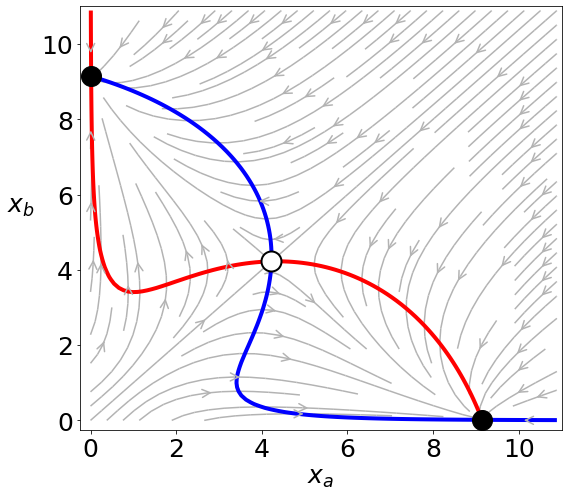

In [3]:
plt.figure(figsize=(8,7))

xmin = 0
xmax = 11
x1, x2 = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/100),\
                     np.arange(xmin, xmax, (xmax-xmin)/100))

# To draw the flux
plt.streamplot(x1, x2, dx1dt(x1,x2), dx2dt(x1,x2), color=[0.7, 0.7, 0.7],
               arrowsize=2,arrowstyle='->')

# To draw the nulclines
cs1 = plt.contour(x1, x2, dx1dt(x1,x2), levels=[0], colors='r', linewidths=4)
cs2 = plt.contour(x1, x2, dx2dt(x1,x2), levels=[0], colors='b', linewidths=4)

# To draw the fixed points
def dxdt(x12,t):
    x1, x2 = x12
    dx1 = dx1dt(x1,x2)
    dx2 = dx2dt(x1,x2)
    return [dx1, dx2]

Tmax = 100
dt = 1.0
tvec = np.arange(0,Tmax,dt)
x10 = 10
x20 = 0.1
xout = odeint(dxdt,[x10,x20],tvec)
plt.plot(xout[-1,0],xout[-1,1],'o',markerfacecolor='black',
         markeredgecolor='black',markersize=20)
x10 = 0.1
x20 = 10
xout = odeint(dxdt,[x10,x20],tvec)
plt.plot(xout[-1,0],xout[-1,1],'o',markerfacecolor='black',
         markeredgecolor='black',markersize=20)
x10 = 0.1
x20 = 0.1
xout = odeint(dxdt,[x10,x20],tvec)
plt.plot(xout[-1,0],xout[-1,1],'o',markerfacecolor='white',
         markeredgecolor='black',markersize=20,markeredgewidth=2)

plt.xlim([-0.25,xmax])
plt.ylim([-0.25,xmax])
plt.xlabel('$x_a$')
plt.ylabel('$x_b$',rotation=0,labelpad=20)

plt.tight_layout()
plt.savefig('fig2b.pdf')
plt.show()